Task-1

In [4]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements basic AND operations with MCP Neuron for two inputs.
    Arguments:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Returns:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2 # Threshold value
result = MCP_Neurons_AND(X1, X2, T)
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    T (int): Threshold value.
    Returns:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example usage for MCP_Neurons_OR function
T = 1 # Threshold value for OR gate
result_or = MCP_Neurons_OR(X1, X2, T)
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

# Answers to the questions:
# 1. Limitations of MCP Neurons:
#    - MCP neurons only work with linearly separable functions like AND and OR but fail with XOR.
#    - It has fixed threshold values, which limits its ability to learn dynamically.
#    - Cannot handle complex problems requiring multi-layer processing.
#    - No learning capability, as weights are not adjusted automatically.
#
# 2. XOR Function using MCP Neuron:
#    XOR cannot be directly implemented using a single-layer MCP neuron as it is not linearly separable.
#    However, we can use a combination of MCP neurons to form an XOR gate:
#    - Use AND, OR, and NAND (NOT AND) gates to create an XOR function:
#      XOR = (X1 OR X2) AND (NOT (X1 AND X2))


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]
Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


Task-2

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


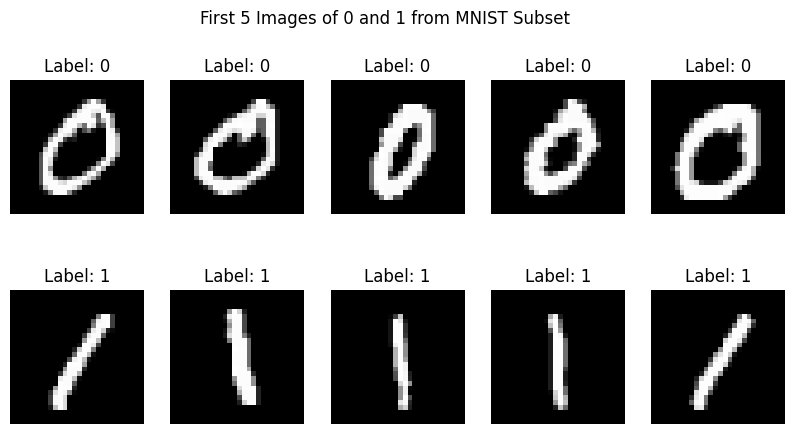

The Final Accuracy is: 1.0
All images were correctly classified!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI and Machine Learning/Copy of mnist_0_and_1.csv")

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Print the shape of features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

# Visualize some images
images_0 = X[y == 0]
images_1 = X[y == 1]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 0")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 1")
    axes[1, i].axis("off")
plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
plt.show()

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Decision function
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function

# Train Perceptron
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            prediction = 1 if output >= 0 else 0
            error = y[i] - prediction

            # Update rule
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    # Compute accuracy
    y_pred = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred == y)
    return weights, bias, accuracy

# Train perceptron
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
print("The Final Accuracy is:", accuracy)

# Visualize misclassified images
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Task-3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (update the correct file path if necessary)
df_3_5 = pd.read_csv("/content/drive/MyDrive/AI and Machine Learning/Copy of mnist_3_and_5.csv")

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels per image
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels: Perceptron works with binary classification (0 and 1)
y = np.where(y == 3, 0, 1)  # Convert 3 → 0 and 5 → 1

# Check the shape
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


Visualize Sample Images

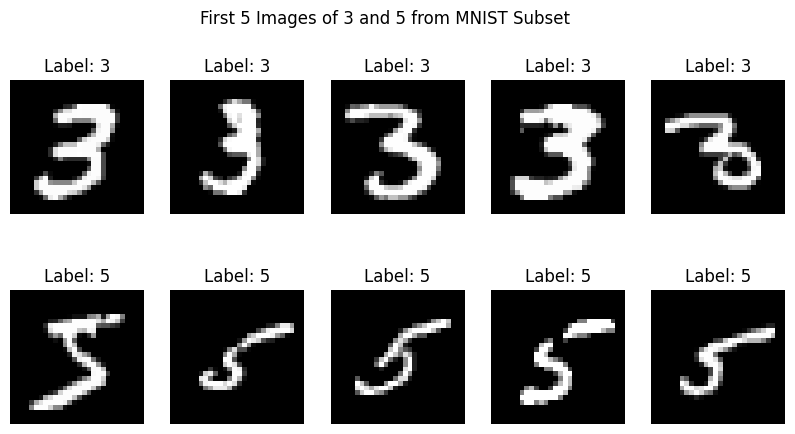

In [7]:
# Separate images for label 3 and label 5
images_3 = X[y == 0]  # All images with label 3
images_5 = X[y == 1]  # All images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")

plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
plt.show()


Initialize Weights and Bias

In [8]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100


Implement Decision Function

In [9]:
def decision_function(X, weights, bias):
    """Compute the predicted labels using the Perceptron step function."""
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)  # Step function activation

Implement Perceptron Training Algorithm

In [10]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """Train the perceptron model."""
    for epoch in range(epochs):
        for i in range(len(X)):
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0  # Step function

            error = y[i] - y_pred  # Compute error

            # Update weights and bias if the prediction is wrong
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

Train the Perceptron

In [11]:
weights, bias = train_perceptron(X, y, weights, bias)

 Evaluate Model Performance

In [12]:
# Get predictions
y_pred = decision_function(X, weights, bias)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {accuracy:.4f}")

Final Accuracy: 0.9869


Visualize Misclassified Images

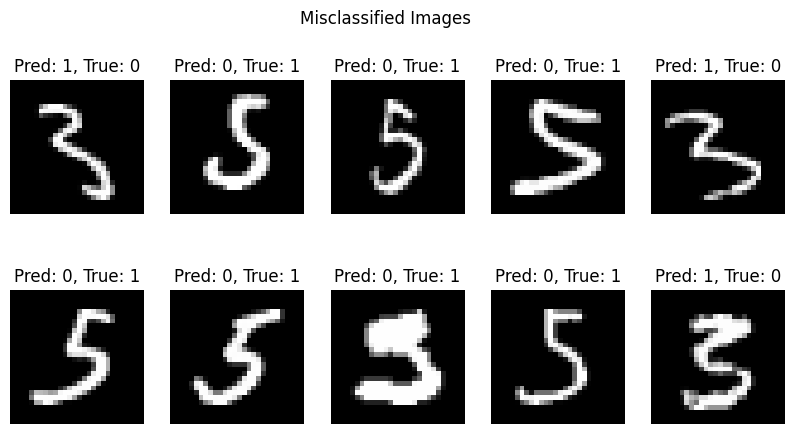

In [13]:
# Identify misclassified images
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")